## Load Packages

In [1]:
using Printf, Distributions
include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

In [2]:
using Plots
gr(size=(480,320))
default(fmt = :svg)

# MV Frontier by Simulations

We illustrate the mean-variance frontier (really, the $\sigma \times \mu$ frontier) by calculating the portfolio mean and standard deviation for a large number of randomly drawn portfolios (in each case the portfolio weights should sum to one).

As always, we have 
$\text{E}R_p = w'\mu$ and 

$\text{Var}(R_p) = w'\Sigma w$.

The information about $\mu$ and $\Sigma$ is found below.

In [3]:
μ = [11.5; 9.5; 6]/100          #expected returns
Σ  = [166  34  58;              #covariance matrix
       34  64   4;
       58   4 100]/100^2

n = length(μ)

3

In [4]:
using Random
Random.seed!(123)

NSim = 2000
(ERp,StdRp) = (fill(NaN,NSim),fill(NaN,NSim))

for i = 1:NSim
    w = randn(n-1)       #draw n-1 random portfolio weights
    w = [w;1-sum(w)]     #make the n weights sum to 1
    ERp[i]   = w'μ
    StdRp[i] = sqrt(w'Σ*w)
end

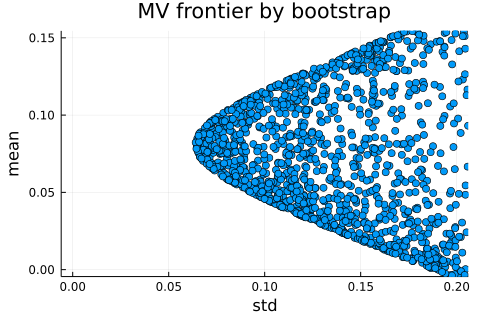

In [6]:
p1 = scatter(StdRp,ERp,
        title = "MV frontier by bootstrap",
        xlabel = "std",
        ylabel = "mean",
        xlims = [0,0.2],
        ylims = [0.0,0.15],
        legend = false )
display(p1)

In [7]:
NSim = 2000
(ERp,StdRp) = (fill(NaN,NSim),fill(NaN,NSim))

for i = 1:NSim
    w = rand(n-1)        #draw n-1 random portfolio weights on [0,1]
    w = [w;1-sum(w)]     #make the n weights sum to 1
    if all(w.>=0)        #don't allow short sales
        ERp[i]   = w'μ
        StdRp[i] = sqrt(w'Σ*w)
    end    
end

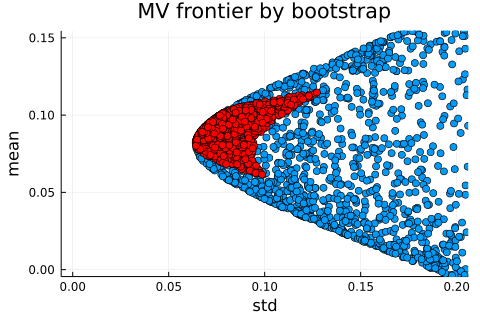

In [8]:
scatter!(p1,StdRp,ERp,
        title = "MV frontier by bootstrap",
        xlabel = "std",
        ylabel = "mean",
        xlims = [0,0.2],
        ylims = [0,0.15],
        legend = false,
        color= :red )